# Examen de Sistemas Inteligentes junio 2024
## Parte práctica
### Nombre del alumno

David Ferreras Díaz

***

**Instrucciones:** Carga el fichero pet_adoption_data.csv, y contexta las preguntas debajo de los encabezados.


### Ejercicio 1

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
df = pd.read_csv("./pet_adoption_data.csv")

# Conteo Nan y drop
countNaN = df.isna().sum()
print(countNaN)
df = df.dropna(how="any")
countNaN = df.isna().sum()
print(countNaN)

df_2 = df
#id = df["PetID"].to_numpy()
#df = df.drop("PetID",axis=1)
PetType = df["PetType"].to_numpy()
df = df.drop("PetType", axis=1)
Breed = df["Breed"].to_numpy()
df = df.drop("Breed", axis=1)
Color = df["Color"].to_numpy()
df = df.drop("Color", axis=1)
Vaccinated = df["Vaccinated"].to_numpy()
df = df.drop("Vaccinated", axis=1)
HealthCondition = df["HealthCondition"].to_numpy()
df = df.drop("HealthCondition", axis=1)
PreviousOwner = df["PreviousOwner"].to_numpy()
df = df.drop("PreviousOwner", axis=1)
Size = df["Size"].to_numpy()
df = df.drop("Size", axis=1)

encoder = OneHotEncoder(sparse_output=False)
#id = encoder.fit_transform(id.reshape(-1,1))
PetType = encoder.fit_transform(PetType.reshape(-1,1))
Breed = encoder.fit_transform(Breed.reshape(-1,1))
Color = encoder.fit_transform(Color.reshape(-1,1))
Vaccinated = encoder.fit_transform(Vaccinated.reshape(-1,1))
HealthCondition = encoder.fit_transform(HealthCondition.reshape(-1,1))
PreviousOwner = encoder.fit_transform(PreviousOwner.reshape(-1,1))
Size = encoder.fit_transform(Size.reshape(-1,1))

Y = df["AdoptionLikelihood"].to_numpy()
X = df.drop("AdoptionLikelihood", axis=1)
X = X.to_numpy()


print(X.shape)
print(Y.shape)
X = np.hstack((X, PetType, Breed, Color, Size,Vaccinated, HealthCondition, PreviousOwner))
print(X.shape)

X_scaled = MinMaxScaler().fit_transform(X) #MinMaxScaler para salidas entre 0 y 1

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y,
    test_size=0.2,
    random_state=13,
    stratify=Y
)

print(x_train.shape)
print(x_test.shape)


PetID                 2
PetType               1
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              1
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64
PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64
(2003, 5)
(2003,)
(2003, 30)
(1602, 30)
(401, 30)


### Ejercicio 2

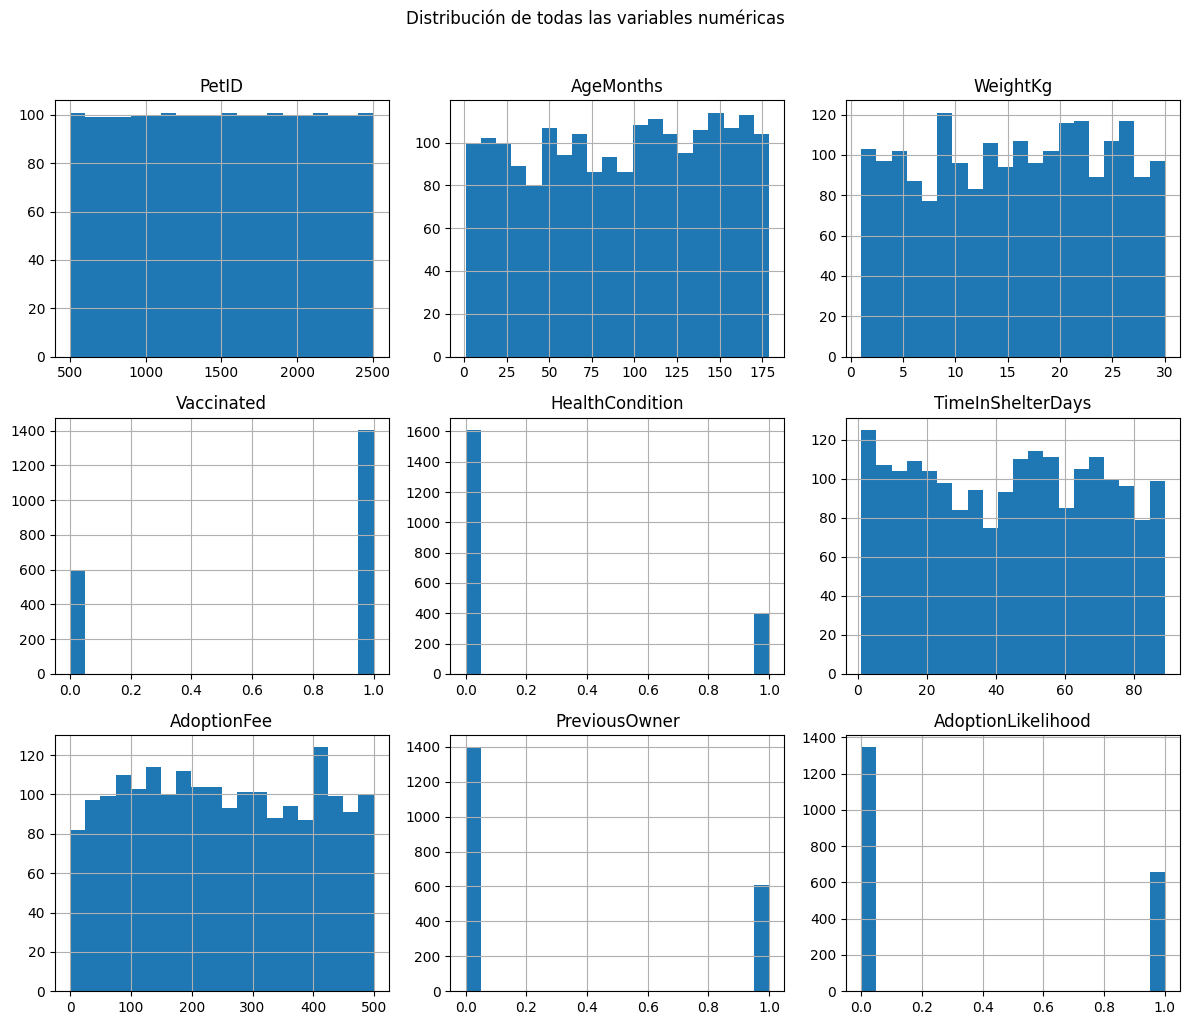

In [94]:
import matplotlib.pyplot as plt
df_2.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribución de todas las variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

### Ejercicio 3

In [88]:
from sklearn.neural_network import MLPClassifier
import time 

t_p = time.time()
model_p = MLPClassifier(alpha=0.01, max_iter=3000, verbose=1, random_state=13).fit(x_train, y_train)
t_p = time.time() - t_p

Iteration 1, loss = 0.67547867
Iteration 2, loss = 0.62383323
Iteration 3, loss = 0.59396773
Iteration 4, loss = 0.56760020
Iteration 5, loss = 0.54311661
Iteration 6, loss = 0.51692850
Iteration 7, loss = 0.49478930
Iteration 8, loss = 0.47401589
Iteration 9, loss = 0.45688780
Iteration 10, loss = 0.43802981
Iteration 11, loss = 0.42022161
Iteration 12, loss = 0.40561372
Iteration 13, loss = 0.39227729
Iteration 14, loss = 0.38010207
Iteration 15, loss = 0.37101586
Iteration 16, loss = 0.36440157
Iteration 17, loss = 0.35573248
Iteration 18, loss = 0.34843360
Iteration 19, loss = 0.34675741
Iteration 20, loss = 0.33835980
Iteration 21, loss = 0.33445294
Iteration 22, loss = 0.32907618
Iteration 23, loss = 0.33650386
Iteration 24, loss = 0.32978020
Iteration 25, loss = 0.32605226
Iteration 26, loss = 0.32484526
Iteration 27, loss = 0.32028950
Iteration 28, loss = 0.31827790
Iteration 29, loss = 0.32037751
Iteration 30, loss = 0.31598149
Iteration 31, loss = 0.31477647
Iteration 32, los

C:\Users\Deiviss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
y_pred_p = model_p.predict(x_test)
acc_p = model_p.score(x_test, y_test)
print(acc_p)

0.912718204488778


### Ejercicio 4

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=13,
    max_depth=11,
    min_samples_split=2,
)
# Tiempo y modelo
t_init = time.time()
dt_model.fit(x_train, y_train)
t_decTree = time.time() - t_init

In [79]:
y_pred_dt = dt_model.predict(x_test)
acc_dt = dt_model.score(x_test, y_test)
print(acc_dt)

0.9551122194513716


### Ejercicio 5

In [83]:
from sklearn.metrics import confusion_matrix
print(f"Perceptron: {acc_p:.4f} Time: {t_p:.2f}")
print(f"Decision Tree: {acc_dt:.4f} Time: {t_decTree:.2f}")

def matrix_view(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, index=['Actual 0 (improbable)', 'Actual 1 (probable)'],
    columns=['Pred 0 (improbable)', 'Pred 1 (probable)'])
    print(cm_df)

matrix_view(y_test, y_pred_p)
matrix_view(y_test, y_pred_dt)

Perceptron: 0.9127 Time: 1.35
Decision Tree: 0.9551 Time: 0.01
                       Pred 0 (improbable)  Pred 1 (probable)
Actual 0 (improbable)                  255                 14
Actual 1 (probable)                     21                111
                       Pred 0 (improbable)  Pred 1 (probable)
Actual 0 (improbable)                  258                 11
Actual 1 (probable)                      7                125
